Check running TensorFlow version

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

# Sentiment movie reviews classification

This is a binary classification problem (2 classes, negative and positive). 

The dataset I will use is [IMDB reviews](https://ai.stanford.edu/~amaas/data/sentiment/), it contains a set of 25,000 highly polar movie reviews for training, and 25,000 for testing.

I will use a basic dense model to start with and find out how well it performs on this dataset. 1D conv, LSTM, GRU, Bidirectional are stuff I can try later.

In [2]:
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
%matplotlib inline

import random as rand

import numpy as np

## Load IMDB review and get familiar with it

In [3]:
vocab_size = 10000
(train_x, train_y), (test_x, test_y) = datasets.imdb.load_data(num_words=vocab_size)

In [4]:
train_x.shape, train_y.shape

((25000,), (25000,))

In [5]:
test_x.shape, test_y.shape

((25000,), (25000,))

Load the word index dictionary and reverse a few triaing strings

Note: the indices are offset by 3 because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown".

In [6]:
word_index = datasets.imdb.get_word_index()
word_index_reversed = {v: k for k, v in word_index.items()}

In [7]:
translate_sentence = lambda sentence : " ".join([word_index_reversed.get(word - 3, '?') for word in sentence])

In [8]:
random_indecies = rand.choices(list(range(train_x.shape[0])), k=2)

for index in random_indecies:
    sentence = translate_sentence(train_x[index][1:])
    print(sentence, end="\n\n")

this series adds new information and background to the book and includes personal appearances by the author and by ? and other ? it brings the book to life and makes even more sense of the author's subsequent ? collapse br br diamond himself comes off as ? and caring not just a ? or ? academic this series makes it clear that his book was not just a response to a need to ? or ? as the saying goes about ? but a deeply considered answer to a question from someone he respects why you white people got so much ? and we have so little because he respected the intelligence of the ? and his community diamond looked for an answer that didn't insult that intelligence or that community i like to think of his answer in a very simple way in the same spirit as south ? blame canada blame ?

for paris is a ? feast ernest ? br br it is impossible to count how many great talents have ? paris in paintings novels songs ? short but unforgettable quotes and yes movies the celebrated film director max ? said 

## Check how balanced the data is

In [9]:
from collections import Counter

labels_counter = Counter(list(map(int, train_y)))
labels_counter = {k: v for k, v in labels_counter.items()}
labels_counter

{1: 12500, 0: 12500}

## Pad the training and test data

Because of input data is of different sizes, I will set a max length limit on them or pad them if their length was shorter than max length

In [10]:
max_length = 200

# Default :: , padding='pre', truncating='pre'
train_x = pad_sequences(train_x, maxlen=max_length)
test_x = pad_sequences(test_x, maxlen=max_length)

In [11]:
train_x.shape, test_x.shape

((25000, 200), (25000, 200))

## Train

In [12]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 32, input_length=max_length))
model.add(layers.GlobalAveragePooling1D())  # 3% better than using Flatten layer
model.add(layers.Dense(16, activation='relu'))  # More Dense layers with GlobalAveragePooling1D did not improve or worsen the model
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x=train_x, y=train_y, validation_split=0.2, shuffle=True, batch_size=256, epochs=10)
history.history.keys()

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 49us/sample - loss: 0.6783 - accuracy: 0.6916 - val_loss: 0.6538 - val_accuracy: 0.7504
Epoch 2/10
20000/20000 [==============================] - 1s 34us/sample - loss: 0.6195 - accuracy: 0.7910 - val_loss: 0.5793 - val_accuracy: 0.8042
Epoch 3/10
20000/20000 [==============================] - 1s 33us/sample - loss: 0.5322 - accuracy: 0.8322 - val_loss: 0.4922 - val_accuracy: 0.8376
Epoch 4/10
20000/20000 [==============================] - 1s 34us/sample - loss: 0.4395 - accuracy: 0.8612 - val_loss: 0.4152 - val_accuracy: 0.8518
Epoch 5/10
20000/20000 [==============================] - 1s 36us/sample - loss: 0.3637 - accuracy: 0.8769 - val_loss: 0.3624 - val_accuracy: 0.8624
Epoch 6/10
20000/20000 [==============================] - 1s 34us/sample - loss: 0.3090 - accuracy: 0.8898 - val_loss: 0.3277 - val_accuracy: 0.8700
Epoch 7/10
20000/20000 [==============================] -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

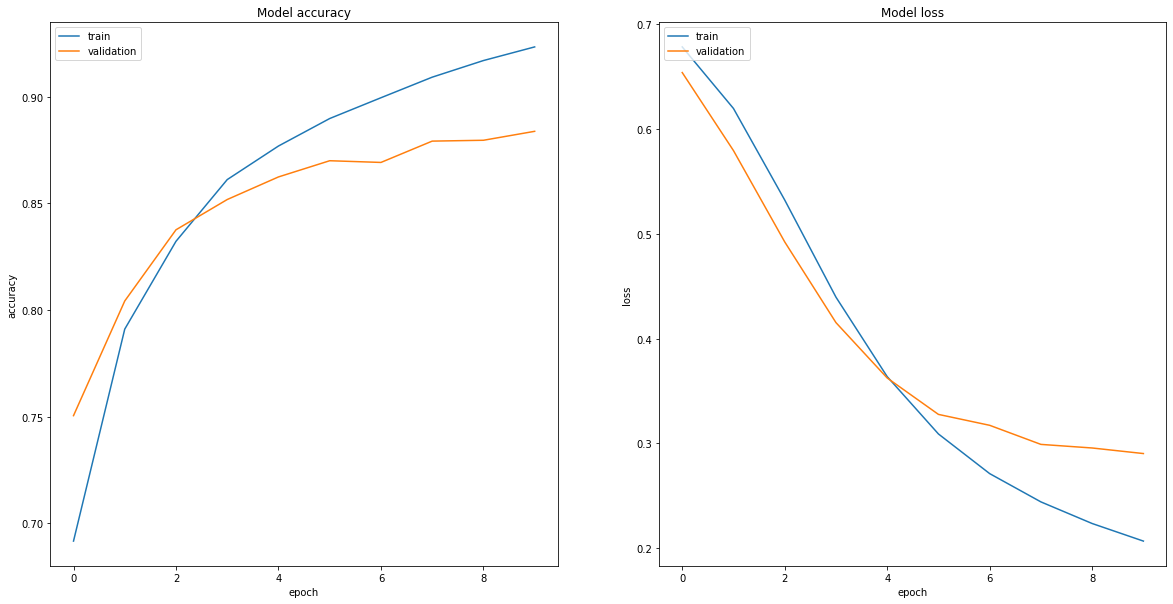

In [15]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

## Evaluate

In [16]:
loss, accuracy = model.evaluate(x=test_x, y=test_y)
loss, accuracy

25000/25000 [==============================] - 0s 17us/sample - loss: 0.2957 - accuracy: 0.8773


(0.29572163078308106, 0.87728)

## Predict on one sentence

In [ ]:
model.trainable = False

In [17]:
sentence

"for paris is a ? feast ernest ? br br it is impossible to count how many great talents have ? paris in paintings novels songs ? short but unforgettable quotes and yes movies the celebrated film director max ? said about paris br br it offered the shining wet ? under the street lights breakfast in ? with ? in your glass coffee and ? ? ? and prostitutes at night everyone in the world has two ? his own and paris br br paris is always associated with love and romance and paris je t'aime which is subtitled ? romances is a collection of short films often sketches from 18 talented directors from all over the world in each we become familiar with one of the city of light 20 ? and with the ? of all ages ? colors and backgrounds who all deal in love in its many variations and stages in some of the ? romances we are the witnesses of the unexpected encounters of the strangers that lead to instant interest ? and perhaps relationship like for ? and ? ? in the street of ? in the opening film or for 

In [18]:
index = 0

sentence = test_x[index]
translate_sentence(sentence), test_y[index]

("? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss",
 0)

In [19]:
sentence = sentence.reshape(1, *sentence.shape)
sentence.shape

(1, 200)

In [20]:
output = model(sentence)
float(output)

0.15766115486621857